<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_16492\934275472.py:6: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-19LPOE8\SQLEXPRESS;"
C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_16492\934275472.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


  CountryRegionCode  storeid                           name  StoreDuration  \
0                US      574               Fifth Bike Store             10   
1                US      716  Famous Bike Sales and Service             10   
2                US      926                   Unique Bikes             10   
3                US     1018          Trusted Catalog Store             10   
4                US     1374         Yellow Bicycle Company             10   

   SquareFeet  NumberEmployees  TotalRevenue  
0       26000               25     8663.1794  
1       26000               25     2931.9869  
2       27000               25    41335.5260  
3       25000               25    71038.1450  
4       26000               29    41279.1555  


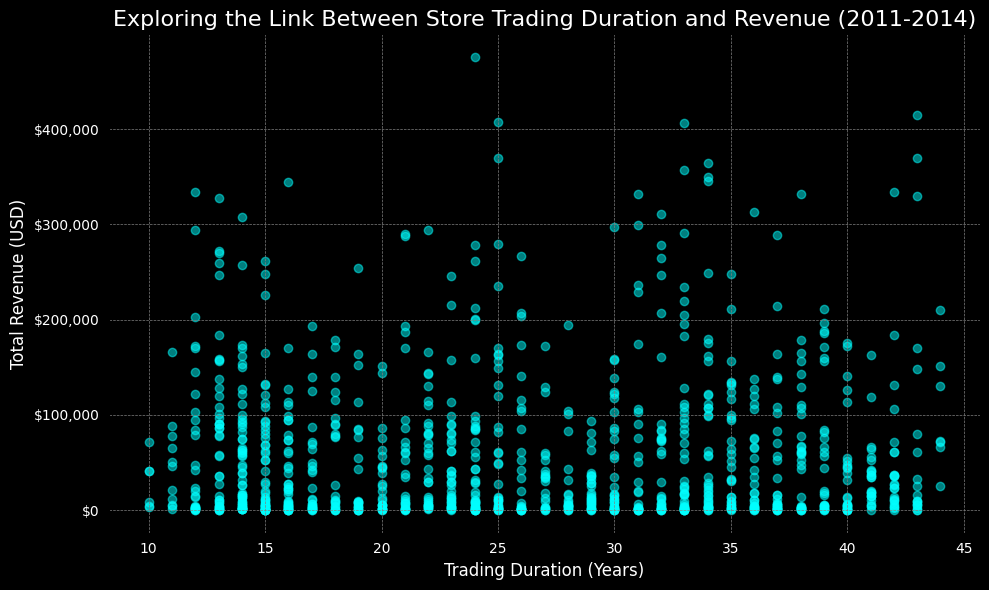

Pearson correlation between Trading Duration and Annual Revenue: 0.02


In [ ]:
import pyodbc
import pandas as pd

# Set up the connection string
connection_string = ("driver={odbc Driver 17 for SQL Server};"
                     "Server=DESKTOP-19LPOE8\SQLEXPRESS;"
                     "Database=AdventureWorks2022;"
                     "Trusted_Connection=yes")
connection = pyodbc.connect(connection_string)


# SQL query to fetch data from the view

query = """
	select CountryRegionCode,storeid, s.name, Year(duedate)- YearOpened as StoreDuration ,s.SquareFeet ,NumberEmployees, sum(TotalDue)as TotalRevenue  from AdventureWorks2022.Sales.SalesOrderHeader soh  
	left join AdventureWorks2022.Sales.Customer c on  soh.CustomerID = c.CustomerID
	left join Sales.vStoreWithDemographics s on s.BusinessEntityID = c.storeid
	left join Sales.SalesTerritory t on t.TerritoryID = soh.TerritoryID
	where storeid is not null 
	group by CountryRegionCode,storeid, s.name,  Year(duedate)- YearOpened , s.SquareFeet ,s.NumberEmployees
	order by  Year(duedate)- YearOpened  ,CountryRegionCode, storeid , s.SquareFeet, s.NumberEmployees
"""

# Load data into pandas DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the data
print(df.head())

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np




# Plot the relationship between trading duration and annual revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['StoreDuration'], df['TotalRevenue'] , color='aqua', alpha=0.5)

# Sets the background color to black
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

# Customize gridlines (optional)
plt.grid(True, color='grey', linestyle='--', linewidth=0.5)

# Set titles and labels
plt.title('Exploring the Link Between Store Trading Duration and Revenue (2011-2014)', fontsize=16, color='white')
plt.xlabel('Trading Duration (Years)', fontsize=12, color='white')
plt.ylabel('Total Revenue (USD)', fontsize=12, color='white')

# Customize ticks
plt.xticks(color='white')  # X-axis tick color
plt.yticks(color='white')  # Y-axis tick color

# Format y-axis to display the USD sign ($)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '${:,}'.format(int(x), color='white')))

# Add grid lines for better readability
# plt.grid(True, axis='y', linestyle='--', color='lightgray', linewidth=0.5)

# Adjust the layout to ensure the plot looks neat
plt.tight_layout()

# Show the plot
plt.show()

# Calculate the correlation coefficient between Trading Duration and Annual Revenue
correlation = df['StoreDuration'].corr(df['TotalRevenue'])

print(f"Pearson correlation between Trading Duration and Annual Revenue: {correlation:.2f}")